In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder

In [3]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\Student_Performance.csv")

In [4]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
data.shape

(10000, 6)

In [6]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [8]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(9873, 6)

In [11]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [12]:
data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>],
       [<Axes: title={'center': 'Performance Index'}>, <Axes: >]],
      dtype=object)

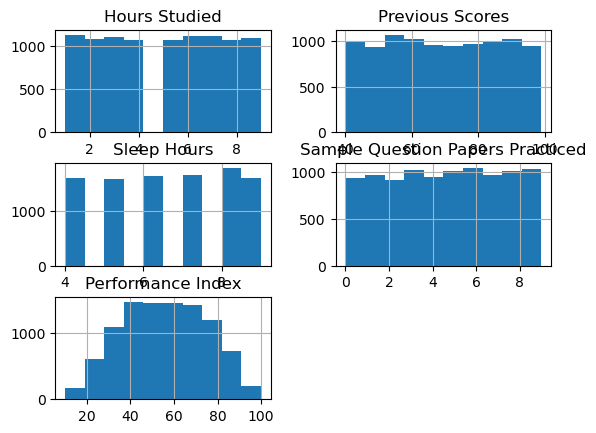

In [13]:
data.hist()

In [45]:
data.skew()

Hours Studied                      -0.003348
Previous Scores                     0.005581
Extracurricular Activities          0.020059
Sleep Hours                        -0.041350
Sample Question Papers Practiced   -0.034893
Performance Index                  -0.000412
dtype: float64

In [14]:
encoder=LabelEncoder()

In [15]:
data["Extracurricular Activities"]=encoder.fit_transform(data['Extracurricular Activities'])

In [16]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


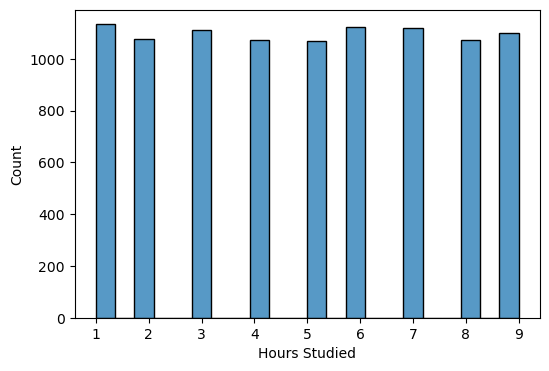

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(data['Hours Studied'])
plt.show()

In [18]:
data['Hours Studied'].skew()

np.float64(-0.0033483737916364534)

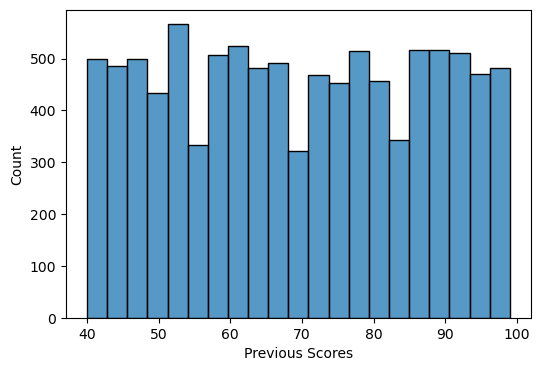

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(data['Previous Scores'])
plt.show()

In [20]:
data['Previous Scores'].skew()

np.float64(0.0055813419610842956)

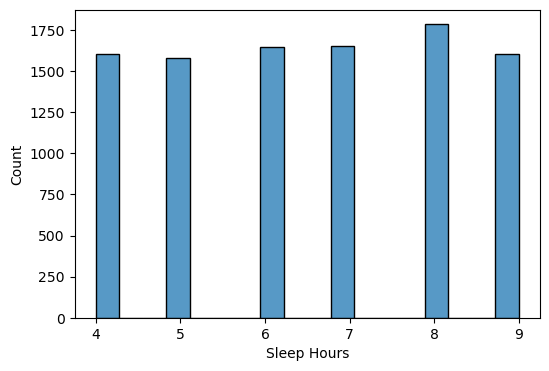

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(data['Sleep Hours'])
plt.show()

In [22]:
data['Sleep Hours'].skew()

np.float64(-0.04134960099660273)

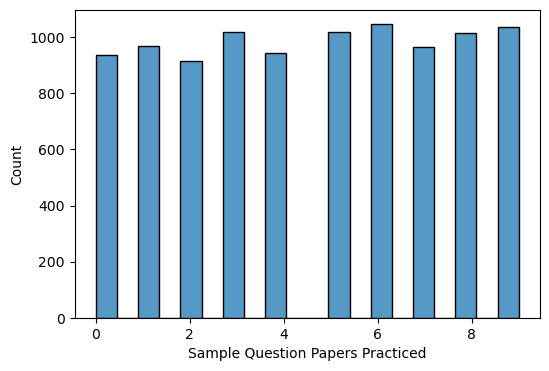

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(data['Sample Question Papers Practiced'])
plt.show()

In [24]:
data['Sample Question Papers Practiced'].skew()

np.float64(-0.034893124735861716)

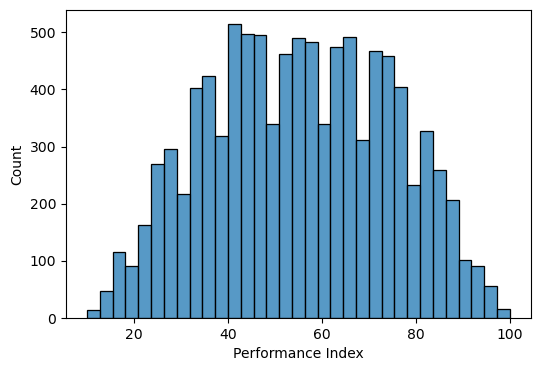

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(data['Performance Index'])
plt.show()

In [26]:
data['Performance Index'].skew()

np.float64(-0.00041186196091178305)

In [27]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [46]:
scaler=StandardScaler()
data["Hours Studied"]=scaler.fit_transform(data[["Hours Studied"]])
data["Previous Scores"]=scaler.fit_transform(data[["Previous Scores"]])
data["Extracurricular Activities"]=scaler.fit_transform(data[["Extracurricular Activities"]])
data["Sleep Hours"]=scaler.fit_transform(data[["Sleep Hours"]])
data["Sample Question Papers Practiced"]=scaler.fit_transform(data[["Sample Question Papers Practiced"]])

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [48]:
x=data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y=data[['Performance Index']]

In [49]:
x.shape,y.shape

((9873, 5), (9873, 1))

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
x_train.shape,x_test.shape

((7898, 5), (1975, 5))

In [51]:
y_train.shape,y_test.shape

((7898, 1), (1975, 1))

In [52]:
x.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775566,1.706168,1.010078,1.454025,-1.249715
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925
2,1.161822,-1.064438,1.010078,0.275889,-0.900925
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925
4,0.775566,0.320865,-0.990022,0.864957,0.145444


In [53]:
y.head()

,Performance Index
0,1.862979
1,0.509348
2,-0.531907
3,-1.000471
4,0.561411


In [54]:
model=LinearRegression() 

In [55]:
model.fit(x_train,y_train)

LinearRegression()

In [56]:
model.intercept_, model.coef_

(array([-0.00063426]),
 array([[0.384283  , 0.91859613, 0.01493664, 0.04172256, 0.0281672 ]]))

In [57]:
predicted_val=model.predict(x_test)

In [58]:
predicted_val

array([[-0.45485328],
       [ 1.30514648],
       [ 0.30449081],
       ...,
       [ 1.13849663],
       [ 1.61551254],
       [-1.0067534 ]])

In [69]:
mean_squared_error(y_test,predicted_val) #near 0

0.011671265615520251

In [60]:
r2_score(y_test,predicted_val)   #near 1

0.9884301209927054

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
polynomial=PolynomialFeatures(degree=2)
poly_features=polynomial.fit_transform(x_train)
model=LinearRegression()
model.fit(poly_features,y_train)

LinearRegression()

In [65]:
model.coef_,model.intercept_

(array([[ 0.00000000e+00,  3.84239946e-01,  9.18627094e-01,
          1.50022707e-02,  4.17908269e-02,  2.81742218e-02,
          1.15225463e-03,  1.76306778e-05,  9.42567730e-04,
          2.23901465e-03,  9.57903311e-04, -1.17110322e-03,
          1.06737730e-03,  5.14521957e-04, -1.05605644e-03,
          3.00881084e-04, -4.85044420e-04, -1.18871901e-03,
          1.30341052e-03,  1.25105260e-03,  9.70559211e-05]]),
 array([-0.00235197]))

In [66]:
test_features=polynomial.fit_transform(x_test)

In [67]:
pred=model.predict(test_features)

In [68]:
from sklearn.svm import SVC,SVR